## Installation

In [1]:
# install package dependencies Seurat, scLink and dplyr
install.packages('scLink',version='1.0.1')
install.packages('dplyr')
remotes::install_version("Seurat", "4.4.0")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(devtools)
install_github("KChen-lab/transition-cells-identification",force=T)

Loading required package: usethis




── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmp1sPjxQ/remotes1519245f84a68/KChen-lab-transition-cells-identification-b011cba/DESCRIPTION’ ... OK
* preparing ‘CellTran’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘CellTran_0.0.0.9000.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(CellTran)
options(warn=-1)

## Read data

In [4]:
# read simulation data generated by SERGIO
library(Seurat)
n_tr=1000
n_st=500
data_transit<-read.csv('transit.csv',row.names=1)
rownames(data_transit)<-paste0('gene_',1:nrow(data_transit))
colnames(data_transit)<-paste0('cell_',1:ncol(data_transit))
data_transit<-CreateSeuratObject(data_transit)
data_transit$bin<-c(rep(1,n_tr),rep(2,n_tr),rep(3,n_tr))
state<-read.csv('cell_state.csv',row.names=1)
rownames(state)<-paste0('cell_',1:ncol(data_transit))
colnames(state)<-'state'
data_transit<-AddMetaData(data_transit,state)

data_stable<-read.csv("stable.csv",row.names=1)
rownames(data_stable)<-paste0('gene_',1:nrow(data_stable))
colnames(data_stable)<-paste0('cell_',(1+ncol(data_transit)):(ncol(data_transit)+ncol(data_stable)))
data_stable<-CreateSeuratObject(data_stable)
data_stable$bin<-c(rep(1,n_st),rep(2,n_st),rep(3,n_st))
data_stable$state<-'stable'

Attaching SeuratObject

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode



# Calculate transition index

In [5]:
# data pre-processing
data<-merge(data_transit,data_stable)
data<-NormalizeData(data)
data<- ScaleData(data)
data<- RunPCA(data, features = rownames(data))
data<- FindNeighbors(data, dims = 1: 5)
data<- FindClusters(data, resolution = 0.5)
data<- RunUMAP(data,dims=1:5)

Centering and scaling data matrix

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
PC_ 1 
Positive:  gene-68, gene-83, gene-36, gene-73, gene-8, gene-10, gene-16, gene-50, gene-71, gene-62 
	   gene-29, gene-9, gene-55, gene-24, gene-46, gene-90, gene-95, gene-81, gene-87, gene-96 
	   gene-93, gene-1, gene-7, gene-37, gene-5, gene-4, gene-89, gene-78, gene-79, gene-85 
Negative:  gene-72, gene-63, gene-49, gene-67, gene-97, gene-92, gene-13, gene-41, gene-44, gene-15 
	   gene-11, gene-35, gene-98, gene-53, gene-38, gene-69, gene-59, gene-66, gene-52, gene-18 
	   gene-70, gene-17, gene-82, gene-100, gene-22, gene-30, gene-28, gene-60, gene-45, gene-76 
PC_ 2 
Positive:  gene-2, gene-42, gene-86, gene-56, gene-12, gene-39, gene-3, gene-6, gene-94, gene-80 
	   gene-74, gene-88, gene-45, gene-28, gene-60, gene-30, gene-76, gene-58, gene-14, gene-91 
	   gene-22, gene-100, gene-8

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4500
Number of edges: 127916

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9029
Number of communities: 9
Elapsed time: 0 seconds


20:47:48 UMAP embedding parameters a = 0.9922 b = 1.112

20:47:48 Read 4500 rows and found 5 numeric columns

20:47:48 Using Annoy for neighbor search, n_neighbors = 30

20:47:48 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

20:47:49 Writing NN index file to temp file /tmp/Rtmp1sPjxQ/file151923a7c9489

20:47:49 Searching Annoy index using 1 thread, search_k = 3000

20:47:51 Annoy recall = 100%

20:47:52 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

20:47:53 Initializing from normalized Laplacian + noise (using irlba)

20:47:53 Commencing optimization for 500 epochs, with 163996 positive edges

20:48:00 Optimization finished



In [6]:
# calculate transition index
data<-transition_index(data,n_neighbor=50,n_gene=100)

[1] "3"


Regressing out nCount_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  gene-75, gene-19, gene-1, gene-12, gene-25, gene-62, gene-79, gene-28, gene-86, gene-63 
	   gene-81, gene-10, gene-52, gene-68, gene-35, gene-4, gene-54, gene-11, gene-58, gene-90 
	   gene-95, gene-13, gene-85, gene-30, gene-8, gene-89, gene-92, gene-20, gene-18, gene-84 
Negative:  gene-38, gene-2, gene-80, gene-82, gene-14, gene-42, gene-36, gene-17, gene-49, gene-69 
	   gene-56, gene-76, gene-48, gene-67, gene-74, gene-53, gene-50, gene-24, gene-98, gene-41 
	   gene-29, gene-87, gene-64, gene-37, gene-99, gene-91, gene-72, gene-5, gene-60, gene-3 
PC_ 2 
Positive:  gene-70, gene-6, gene-72, gene-42, gene-100, gene-17, gene-9, gene-45, gene-88, gene-5 
	   gene-75, gene-48, gene-4, gene-79, gene-28, gene-12, gene-86, gene-52, gene-57, gene-65 
	   gene-43, gene-78, gene-91, gene-80, gene-41, gene-77, gene-58, gene-40, gene-76, gene-15 
Negative:  gene-84, gene-39, gene-27, gene-47, gene-66, gene-55, g

[1] "2"


Regressing out nCount_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  gene-48, gene-89, gene-93, gene-53, gene-54, gene-82, gene-55, gene-77, gene-42, gene-37 
	   gene-10, gene-85, gene-38, gene-16, gene-64, gene-5, gene-33, gene-39, gene-12, gene-45 
	   gene-72, gene-73, gene-15, gene-26, gene-7, gene-51, gene-60, gene-97, gene-94, gene-61 
Negative:  gene-20, gene-41, gene-100, gene-35, gene-4, gene-90, gene-67, gene-66, gene-86, gene-21 
	   gene-74, gene-29, gene-56, gene-19, gene-88, gene-28, gene-49, gene-69, gene-6, gene-30 
	   gene-78, gene-14, gene-91, gene-52, gene-70, gene-34, gene-50, gene-44, gene-81, gene-79 
PC_ 2 
Positive:  gene-30, gene-16, gene-7, gene-45, gene-62, gene-3, gene-98, gene-17, gene-65, gene-36 
	   gene-27, gene-44, gene-2, gene-37, gene-88, gene-94, gene-28, gene-13, gene-10, gene-66 
	   gene-41, gene-52, gene-84, gene-18, gene-49, gene-92, gene-67, gene-6, gene-50, gene-77 
Negative:  gene-75, gene-20, gene-71, gene-47, gene-26, gene-31,

[1] "8"


Regressing out nCount_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  gene-39, gene-50, gene-26, gene-31, gene-67, gene-99, gene-63, gene-46, gene-78, gene-89 
	   gene-24, gene-23, gene-73, gene-100, gene-72, gene-60, gene-94, gene-13, gene-96, gene-92 
	   gene-69, gene-40, gene-71, gene-34, gene-43, gene-28, gene-84, gene-16, gene-64, gene-9 
Negative:  gene-2, gene-79, gene-38, gene-42, gene-11, gene-15, gene-86, gene-85, gene-44, gene-56 
	   gene-95, gene-68, gene-41, gene-30, gene-27, gene-7, gene-36, gene-82, gene-90, gene-17 
	   gene-76, gene-18, gene-88, gene-77, gene-74, gene-97, gene-32, gene-93, gene-1, gene-87 
PC_ 2 
Positive:  gene-35, gene-80, gene-59, gene-4, gene-18, gene-88, gene-92, gene-5, gene-98, gene-40 
	   gene-32, gene-57, gene-45, gene-34, gene-8, gene-16, gene-47, gene-56, gene-78, gene-20 
	   gene-67, gene-46, gene-91, gene-38, gene-21, gene-36, gene-9, gene-76, gene-71, gene-42 
Negative:  gene-19, gene-62, gene-61, gene-75, gene-25, gene-74,

[1] "5"


Regressing out nCount_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  gene-9, gene-54, gene-10, gene-1, gene-37, gene-55, gene-8, gene-5, gene-24, gene-89 
	   gene-62, gene-46, gene-71, gene-7, gene-29, gene-4, gene-16, gene-78, gene-50, gene-99 
	   gene-33, gene-84, gene-31, gene-43, gene-19, gene-26, gene-61, gene-47, gene-23, gene-32 
Negative:  gene-72, gene-13, gene-97, gene-41, gene-70, gene-92, gene-18, gene-66, gene-69, gene-38 
	   gene-35, gene-49, gene-15, gene-52, gene-44, gene-98, gene-63, gene-82, gene-11, gene-59 
	   gene-67, gene-53, gene-17, gene-22, gene-100, gene-2, gene-94, gene-56, gene-12, gene-86 
PC_ 2 
Positive:  gene-19, gene-34, gene-25, gene-61, gene-47, gene-68, gene-51, gene-83, gene-27, gene-23 
	   gene-33, gene-43, gene-21, gene-26, gene-99, gene-31, gene-75, gene-40, gene-32, gene-64 
	   gene-73, gene-48, gene-36, gene-65, gene-84, gene-20, gene-57, gene-80, gene-53, gene-15 
Negative:  gene-76, gene-45, gene-30, gene-60, gene-6, gene-28,

[1] "6"


Regressing out nCount_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  gene-38, gene-92, gene-15, gene-72, gene-35, gene-11, gene-59, gene-66, gene-70, gene-44 
	   gene-69, gene-13, gene-52, gene-18, gene-41, gene-53, gene-49, gene-82, gene-67, gene-97 
	   gene-17, gene-98, gene-63, gene-100, gene-22, gene-80, gene-2, gene-56, gene-94, gene-39 
Negative:  gene-9, gene-37, gene-50, gene-5, gene-1, gene-8, gene-7, gene-54, gene-24, gene-10 
	   gene-71, gene-16, gene-55, gene-4, gene-87, gene-89, gene-29, gene-62, gene-79, gene-78 
	   gene-31, gene-77, gene-34, gene-43, gene-46, gene-90, gene-19, gene-84, gene-61, gene-32 
PC_ 2 
Positive:  gene-36, gene-83, gene-34, gene-27, gene-61, gene-68, gene-51, gene-33, gene-73, gene-99 
	   gene-20, gene-26, gene-23, gene-47, gene-43, gene-32, gene-31, gene-19, gene-25, gene-21 
	   gene-75, gene-64, gene-84, gene-48, gene-85, gene-65, gene-63, gene-77, gene-81, gene-40 
Negative:  gene-45, gene-30, gene-74, gene-28, gene-6, gene-58,

[1] "0"


Regressing out nCount_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  gene-59, gene-11, gene-63, gene-17, gene-72, gene-67, gene-53, gene-15, gene-52, gene-69 
	   gene-97, gene-44, gene-66, gene-18, gene-38, gene-49, gene-13, gene-41, gene-92, gene-70 
	   gene-98, gene-35, gene-100, gene-82, gene-22, gene-83, gene-56, gene-94, gene-68, gene-36 
Negative:  gene-74, gene-30, gene-60, gene-88, gene-14, gene-76, gene-28, gene-45, gene-6, gene-20 
	   gene-33, gene-58, gene-51, gene-61, gene-9, gene-7, gene-54, gene-31, gene-1, gene-55 
	   gene-16, gene-25, gene-79, gene-24, gene-37, gene-99, gene-8, gene-29, gene-43, gene-5 
PC_ 2 
Positive:  gene-2, gene-86, gene-83, gene-10, gene-29, gene-55, gene-24, gene-50, gene-95, gene-63 
	   gene-91, gene-22, gene-62, gene-58, gene-68, gene-85, gene-56, gene-96, gene-100, gene-93 
	   gene-76, gene-71, gene-81, gene-44, gene-73, gene-37, gene-46, gene-36, gene-79, gene-45 
Negative:  gene-19, gene-51, gene-75, gene-61, gene-25, gene-3

[1] "7"


Regressing out nCount_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  gene-34, gene-19, gene-43, gene-99, gene-47, gene-23, gene-27, gene-61, gene-51, gene-32 
	   gene-26, gene-33, gene-25, gene-31, gene-21, gene-75, gene-20, gene-84, gene-65, gene-77 
	   gene-40, gene-62, gene-64, gene-55, gene-29, gene-50, gene-57, gene-70, gene-85, gene-17 
Negative:  gene-10, gene-22, gene-4, gene-87, gene-100, gene-89, gene-82, gene-93, gene-7, gene-78 
	   gene-81, gene-80, gene-5, gene-91, gene-3, gene-96, gene-90, gene-73, gene-68, gene-95 
	   gene-12, gene-94, gene-37, gene-79, gene-86, gene-52, gene-54, gene-74, gene-8, gene-72 
PC_ 2 
Positive:  gene-10, gene-9, gene-76, gene-60, gene-74, gene-88, gene-24, gene-58, gene-6, gene-79 
	   gene-50, gene-30, gene-5, gene-45, gene-1, gene-7, gene-28, gene-8, gene-54, gene-29 
	   gene-62, gene-16, gene-14, gene-37, gene-55, gene-71, gene-3, gene-48, gene-84, gene-4 
Negative:  gene-72, gene-66, gene-44, gene-15, gene-83, gene-52, gene

[1] "4"


Regressing out nCount_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  gene-83, gene-68, gene-73, gene-69, gene-72, gene-38, gene-18, gene-63, gene-52, gene-97 
	   gene-66, gene-35, gene-2, gene-98, gene-26, gene-41, gene-13, gene-36, gene-15, gene-44 
	   gene-100, gene-70, gene-67, gene-25, gene-49, gene-53, gene-11, gene-47, gene-43, gene-75 
Negative:  gene-7, gene-9, gene-1, gene-37, gene-8, gene-5, gene-10, gene-28, gene-60, gene-79 
	   gene-54, gene-6, gene-30, gene-76, gene-14, gene-88, gene-62, gene-29, gene-55, gene-16 
	   gene-89, gene-71, gene-74, gene-58, gene-45, gene-24, gene-78, gene-4, gene-50, gene-46 
PC_ 2 
Positive:  gene-4, gene-68, gene-36, gene-78, gene-89, gene-54, gene-83, gene-73, gene-5, gene-16 
	   gene-1, gene-9, gene-31, gene-55, gene-29, gene-51, gene-10, gene-65, gene-27, gene-21 
	   gene-40, gene-24, gene-71, gene-33, gene-19, gene-69, gene-37, gene-75, gene-64, gene-62 
Negative:  gene-86, gene-88, gene-6, gene-2, gene-60, gene-76, gene-

[1] "1"


Regressing out nCount_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  gene-36, gene-82, gene-66, gene-5, gene-35, gene-86, gene-93, gene-84, gene-34, gene-40 
	   gene-14, gene-3, gene-62, gene-37, gene-78, gene-1, gene-95, gene-6, gene-45, gene-4 
	   gene-73, gene-43, gene-30, gene-97, gene-2, gene-69, gene-77, gene-24, gene-83, gene-68 
Negative:  gene-13, gene-67, gene-64, gene-98, gene-65, gene-32, gene-27, gene-25, gene-53, gene-7 
	   gene-70, gene-79, gene-81, gene-20, gene-60, gene-9, gene-90, gene-51, gene-50, gene-74 
	   gene-94, gene-75, gene-10, gene-46, gene-59, gene-76, gene-22, gene-91, gene-8, gene-80 
PC_ 2 
Positive:  gene-57, gene-83, gene-8, gene-50, gene-75, gene-72, gene-19, gene-71, gene-73, gene-80 
	   gene-37, gene-58, gene-88, gene-44, gene-65, gene-39, gene-64, gene-34, gene-1, gene-14 
	   gene-74, gene-93, gene-55, gene-66, gene-67, gene-95, gene-28, gene-27, gene-46, gene-11 
Negative:  gene-87, gene-9, gene-53, gene-47, gene-76, gene-3, gene-

##Visualization

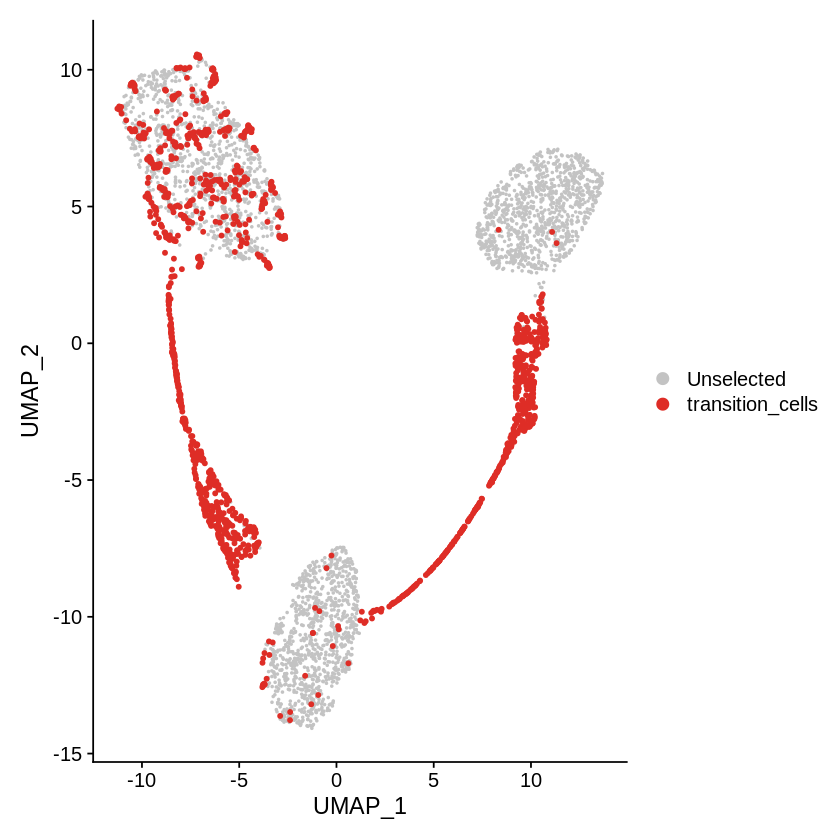

In [7]:
# UMAP colored by true labels (transition cells are highlighted in red)
DimPlot(data,cells.highlight = list('transition_cells'=colnames(subset(data,state=='transit'))))

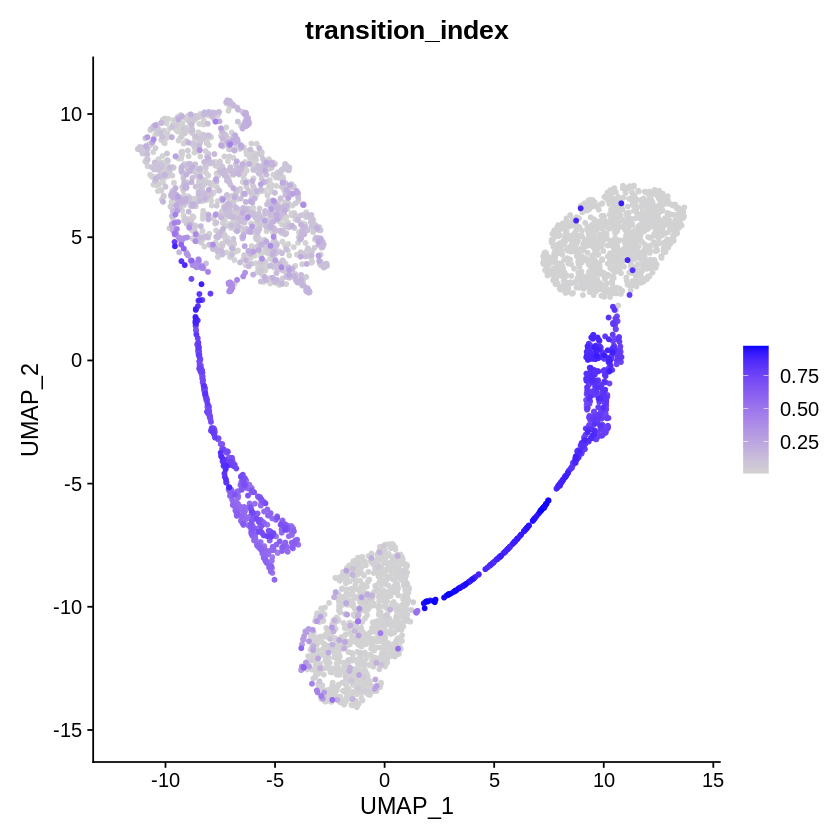

In [8]:
# UMAP colored by transition index calculated using our method
FeaturePlot(data,features='transition_index',order=T,pt.size=1)

# Evaluation

In [9]:
# evaluation metrics: AUROC, PRAUC
install.packages('yardstick')
install.packages('pROC')
library(yardstick)
data$state<-factor(data$state,levels=c('transit','stable'))
print(paste0('PRAUC:',round(pr_auc_vec(data$state,data$transition_index),2)))
library(pROC)
print(paste0('AUROC:',round(roc(data$state,data$transition_index)$auc,2)))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘hardhat’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Registered S3 method overwritten by 'yardstick':
  method       from         
  print.metric spatstat.geom



[1] "PRAUC:0.9"


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = transit, case = stable

Setting direction: controls > cases



[1] "AUROC:0.96"


null device 
          1

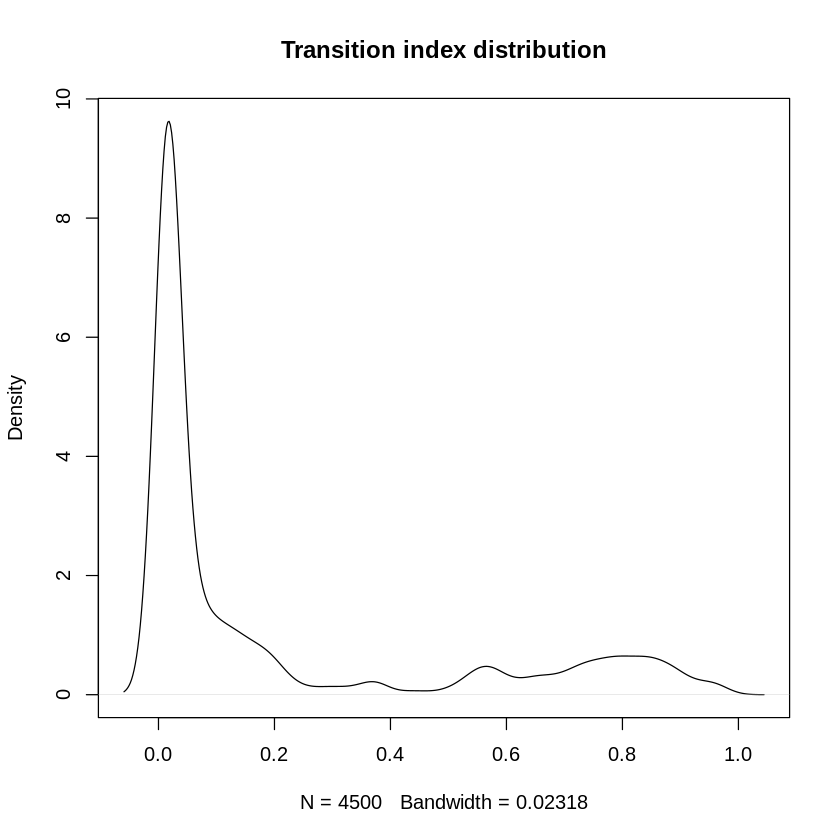

In [10]:
plot(density(data$transition_index),main="Transition index distribution")
dev.off()

In [11]:
# Separating cells into transiton cells and stable cells using GMM (Gaussian
# Mixture Model)
install.packages('mclust')
library(mclust)
fit<-Mclust(data$transition_index,G=2)
transition_cells<-colnames(data)[fit$classification==2 & fit$z[,2]>0.8]

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Package 'mclust' version 6.1.1
Type 'citation("mclust")' for citing this R package in publications.



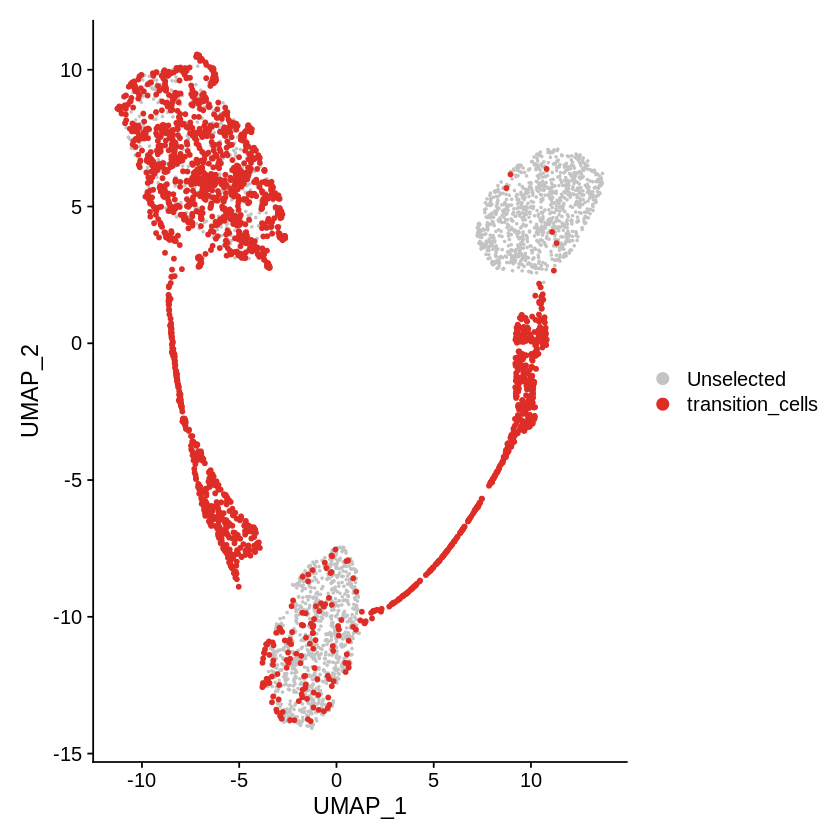

In [12]:
# UMAP highlighted transition cells inferred by our method
DimPlot(data,cells.highlight = list('transition_cells'=transition_cells))